In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.ndimage import rotate
from scipy.spatial.transform import Rotation as R
from sklearn.utils import shuffle
import pandas as pd
import pickle as pickle

In [2]:
smear=0.1
maxTranslation=10
Shuffle=False
nImages=1000
dataDir="/Users/lizhelun/Desktop/QC/VQC-Permutable-Lorentz-symmetry/Images"
name="_smear{}_MaxTran{}_shuffle{}".format(smear,maxTranslation,int(Shuffle))

In [3]:
one=np.array([[0,0],[0,1],[0,2],[0,3]])
seven=np.array([[0,0],[0,1],[0,2],[-1,2]])
zero=np.array([[0,0],[0,2],[2,0],[2,2]])


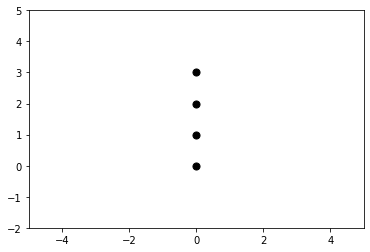

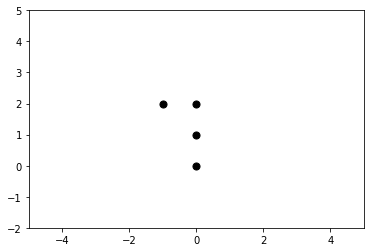

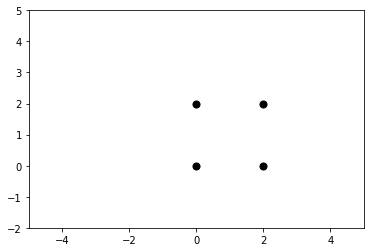

In [4]:

plt.figure(1)
plt.xlim(-5,5)
plt.ylim(-2,5)
for i in range(seven.shape[0]):
    plt.scatter(one[i][0],one[i][1],color='black',s=50)
    

plt.figure(2)
plt.xlim(-5,5)
plt.ylim(-2,5)
for i in range(seven.shape[0]):
    plt.scatter(seven[i][0],seven[i][1],color='black',s=50)
    

plt.figure(3)
plt.xlim(-5,5)
plt.ylim(-2,5)
for i in range(seven.shape[0]):
    plt.scatter(zero[i][0],zero[i][1],color='black',s=50)

In [5]:
def generate(data,smear,move,Shuffle):
    
    if Shuffle:
        data=shuffle(data)
        
        
    center_x=data[:,0].mean()
    center_y=data[:,1].mean()
    newData=data-[center_x,center_y]

    #smear
    newData[:,:]=newData[:,:]+np.random.uniform(-smear,smear,newData.shape)

    
    
    #rotate
    theta=np.random.rand(1)*2*np.pi
    cos=np.cos(theta)
    sin=np.sin(theta)
    newx=newData[:,0]*cos-newData[:,1]*sin
    newy=newData[:,0]*sin+newData[:,1]*cos
    newData[:,0]=newx
    newData[:,1]=newy

    #enlarge:
    scale=np.random.uniform(0.5,5)
    newData[:,0]=newData[:,0]*scale
    newData[:,1]=newData[:,1]*scale
    
    #move
    dx=np.random.uniform(-move,move)
    dy=np.random.uniform(-move,move)
    newData=newData+[dx,dy]
    
    return newData
    
    

In [6]:
data=[]
label=[]

output_dict={"1":[],"0":[],"7":[]}

for i in range(nImages):
    tmpZero=generate(zero,smear,maxTranslation,Shuffle)
    data.append(tmpZero)
    #label.append(np.array([1,0,0]))
    label.append(0)
    output_dict["0"].append(tmpZero)
    
    tmpOne=generate(one,smear,maxTranslation,Shuffle)
    data.append(tmpOne)
    #label.append(np.array([0,1,0]))
    label.append(1)
    output_dict["1"].append(tmpOne)
    
#     tmpSeven=generate(seven,smear,maxTranslation,Shuffle)
#     data.append(tmpSeven)
#     label.append(np.array([0,0,1]))
#     output_dict["7"].append(tmpSeven)

    
data=np.array(data)
label=np.array(label)

output_dict["0"]=np.array(output_dict["0"])
output_dict["1"]=np.array(output_dict["1"])
#output_dict["7"]=np.array(output_dict["7"])

data,label=shuffle(data,label,random_state=1000)

In [7]:
output_dict["0"].shape

(1000, 4, 2)

1


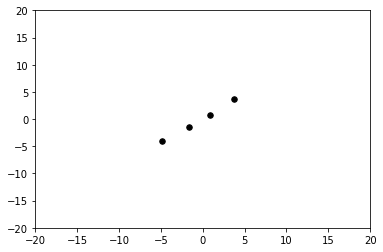

In [8]:

plt.figure(1)
plt.xlim(-20,20)
plt.ylim(-20,20)
i=int(np.random.rand(1)*nImages*3)
for j in range(data[i].shape[0]):
    plt.scatter(data[i][j][0],data[i][j][1],color='black',s=30)
print(label[i])

In [9]:
with open(dataDir+"/images"+name+".pk", "wb") as fp:   #Pickling
    pickle.dump(data, fp)

In [10]:
with open(dataDir+"/label"+name+".pk", "wb") as fp:   #Pickling
    pickle.dump(label, fp)

In [11]:
with open(dataDir+"/outputDict"+name+".pk", "wb") as fp:   #Pickling
    pickle.dump(output_dict, fp)